# Linear Model
Date: June 10, 2018 <br>
Author: Kexuan Zou

## Linear regression

('Weight', array([33.72721842, 10.66944089]))
('Score', 0.8167558657102587)


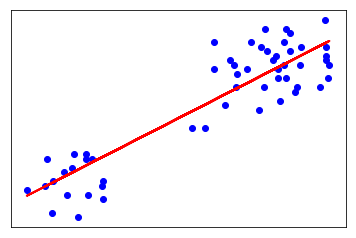

In [3]:
import sys
sys.path.append('../')
from linear_model.LinearRegression import LinearRegression
import util
import matplotlib.pyplot as plt

train_x, train_y, test_x, test_y = util.load_eruption()
model = LinearRegression()
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
score = model.score(test_x, test_y)
print("Weight", model.w)
print("Score", score)
plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, pred_y, color='red', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

## Ridge regression

('Weight', array([ 9.2160416 , 16.08654398]))
('Score', 0.5252881675016716)


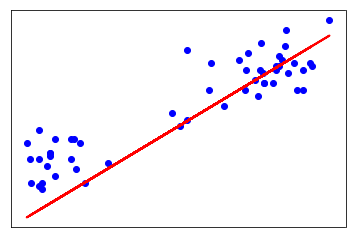

In [19]:
import sys
sys.path.append('../')
from linear_model.Ridge import Ridge
import util
import matplotlib.pyplot as plt

train_x, train_y, test_x, test_y = util.load_eruption()
model = Ridge(alpha=0.2, batch_size=1, learning_rate="constant", eta0=0.01)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
score = model.score(test_x, test_y)
print("Weight", model.w)
print("Score", score)
plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, pred_y, color='red', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

## Lasso regression

('Weight', array([34.12759114, 10.53729724]))
('Score', 0.8094763205120425)


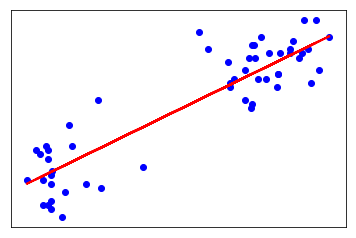

In [2]:
import sys
sys.path.append('../')
from linear_model.Lasso import Lasso
import util
import matplotlib.pyplot as plt

train_x, train_y, test_x, test_y = util.load_eruption()
model = Lasso(alpha=0.2)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
score = model.score(test_x, test_y)
print("Weight", model.w)
print("Score", score)
plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, pred_y, color='red', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

## Logistic regression

In [ ]:
import sys
sys.path.append('../')
from linear_model.Lasso import Lasso
import util
import matplotlib.pyplot as plt
